## Data loading


In [1]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [2]:
print(df.columns)
print(df.isnull().sum())

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## Data exploration

Shape of the DataFrame: (429435, 67)

Data types of each column:
iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Unique values in 'location': ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados']...

Unique values in 'date': ['2020-01-05' '2020-01-06' '2020-01-07' '2020-01-08' '20

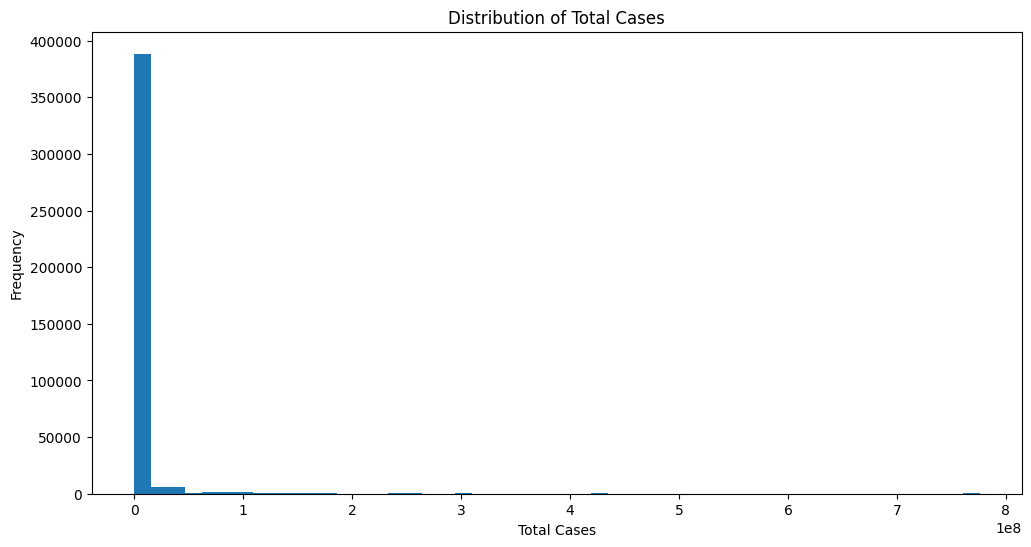

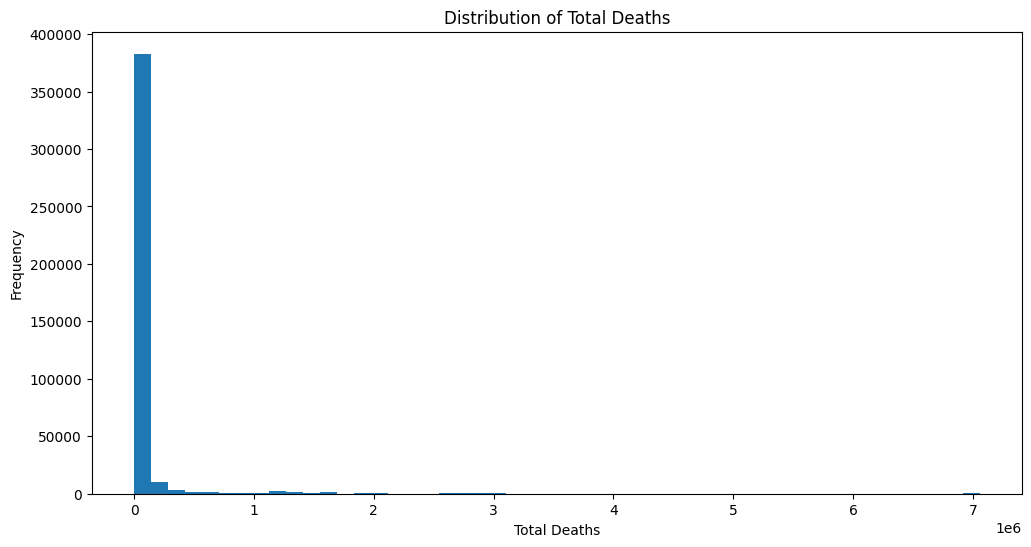

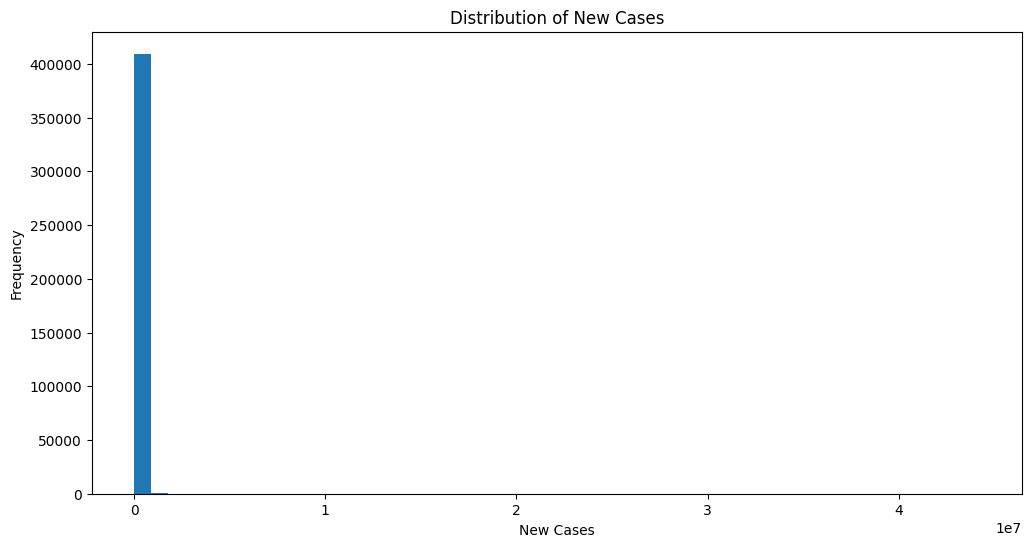


Correlation Matrix:
              total_cases  total_deaths  new_cases
total_cases      1.000000      0.945601   0.127604
total_deaths     0.945601      1.000000   0.156200
new_cases        0.127604      0.156200   1.000000


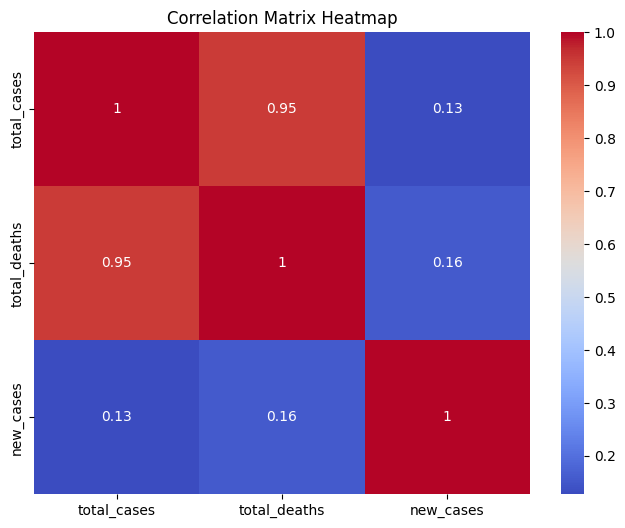

In [3]:
print(f"Shape of the DataFrame: {df.shape}")
print(f"\nData types of each column:\n{df.dtypes}")

key_cols = ['location', 'date']
for col in key_cols:
    print(f"\nUnique values in '{col}': {df[col].unique()[:20]}...") #limiting the output for brevity


numerical_cols = ['total_cases', 'total_deaths', 'new_cases']
print(f"\nDescriptive statistics for numerical columns:\n{df[numerical_cols].describe()}")

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(df['total_cases'], bins=50)  # Adjust bins as needed
plt.title('Distribution of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12,6))
plt.hist(df['total_deaths'], bins=50)
plt.title('Distribution of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(df['new_cases'], bins=50)
plt.title('Distribution of New Cases')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.show()


correlation_matrix = df[numerical_cols].corr()
print(f"\nCorrelation Matrix:\n{correlation_matrix}")

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data cleaning

In [4]:
import pandas as pd

# Filter for specified countries
countries_of_interest = ['Kenya', 'United States', 'India']
filtered_df = df[df['location'].isin(countries_of_interest)].copy()

# Drop rows with missing dates or critical values
filtered_df.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

# Convert date column to datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Interpolate missing numerical values
numerical_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
for col in numerical_cols:
    filtered_df[col] = filtered_df[col].interpolate(method='linear')

# Fill remaining NaN values with 0
filtered_df.fillna(0, inplace=True)

# Display the first few rows of the cleaned DataFrame
display(filtered_df.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0


## Data preparation

In [6]:
# Calculate death rate, handling potential division by zero
filtered_df['death_rate'] = filtered_df['total_deaths'] / filtered_df['total_cases']
filtered_df['death_rate'] = filtered_df['death_rate'].fillna(0)  # Replace NaN with 0

# Create vaccination DataFrame
vaccination_cols = ['location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
vaccination_df = filtered_df[vaccination_cols].copy()

# Ensure numeric data types for vaccination columns
for col in vaccination_cols[2:]:  # Skip 'location' and 'date'
    vaccination_df[col] = pd.to_numeric(vaccination_df[col], errors='coerce')
    vaccination_df.dropna(subset=[col], inplace=True)

display(filtered_df.head())
display(vaccination_df.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,death_rate
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0,0.0


,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
173549,India,2020-01-05,0.0,0.0,0.0
173550,India,2020-01-06,0.0,0.0,0.0
173551,India,2020-01-07,0.0,0.0,0.0
173552,India,2020-01-08,0.0,0.0,0.0
173553,India,2020-01-09,0.0,0.0,0.0


## Data analysis

In [7]:
# Group data by country and calculate descriptive statistics
descriptive_stats = filtered_df.groupby('location').agg(
    {'total_cases': ['mean', 'median', 'std', 'min', 'max'],
     'total_deaths': ['mean', 'median', 'std', 'min', 'max'],
     'new_cases': ['mean', 'median', 'std', 'min', 'max']}
)

# Analyze total cases and deaths over time
total_cases_deaths_end = filtered_df.groupby('location').agg({'total_cases':'max', 'total_deaths':'max'})

# Compare daily new cases
average_daily_new_cases = filtered_df.groupby('location')['new_cases'].mean()
max_daily_new_cases = filtered_df.groupby('location')['new_cases'].max()

# Analyze vaccination data
total_vaccinations_data = vaccination_df.groupby('location').agg({'total_vaccinations':'max', 'people_vaccinated':'max', 'people_fully_vaccinated':'max'})
latest_vaccination_date = vaccination_df.groupby('location').agg({'date':'max'})

# Display the results
display(descriptive_stats)
display(total_cases_deaths_end)
display(average_daily_new_cases)
display(max_daily_new_cases)
display(total_vaccinations_data)
display(latest_vaccination_date)

total_cases                                              \
                       mean      median           std  min          max   
location                                                                  
India          3.111080e+07  43042097.0  1.743004e+07  0.0   45041748.0   
Kenya          2.370479e+05    323609.0  1.313891e+05  0.0     344106.0   
United States  6.327030e+07  79946773.0  4.021421e+07  0.0  103436829.0   

                total_deaths                                           \
                        mean    median            std  min        max   
location                                                                
India          380320.231780  521751.0  203802.189478  0.0   533623.0   
Kenya            4079.434886    5649.0    2202.393488  0.0     5689.0   
United States  777909.996416  984444.0  403021.707487  0.0  1193165.0   

                  new_cases                                        
                       mean median            std  min        max  
location                                                           
India          26906.659498    0.0  175265.039254  0.0  2738957.0  
Kenya            205.559140    0.0    1125.618882  0.0    19023.0  
United States  61790.220430    0.0  308630.012580  0.0  5650933.0

,total_cases,total_deaths
location,,
India,45041748.0,533623.0
Kenya,344106.0,5689.0
United States,103436829.0,1193165.0


,new_cases
location,
India,26906.659498
Kenya,205.559140
United States,61790.220430


,new_cases
location,
India,2738957.0
Kenya,19023.0
United States,5650933.0


,total_vaccinations,people_vaccinated,people_fully_vaccinated
location,,,
India,2.206868e+09,1.027439e+09,951990527.0
Kenya,2.201675e+09,1.449437e+07,11090440.0
United States,6.767288e+08,2.702272e+08,230637348.0


,date
location,
India,2024-08-04
Kenya,2024-08-04
United States,2024-08-04


## Data visualization

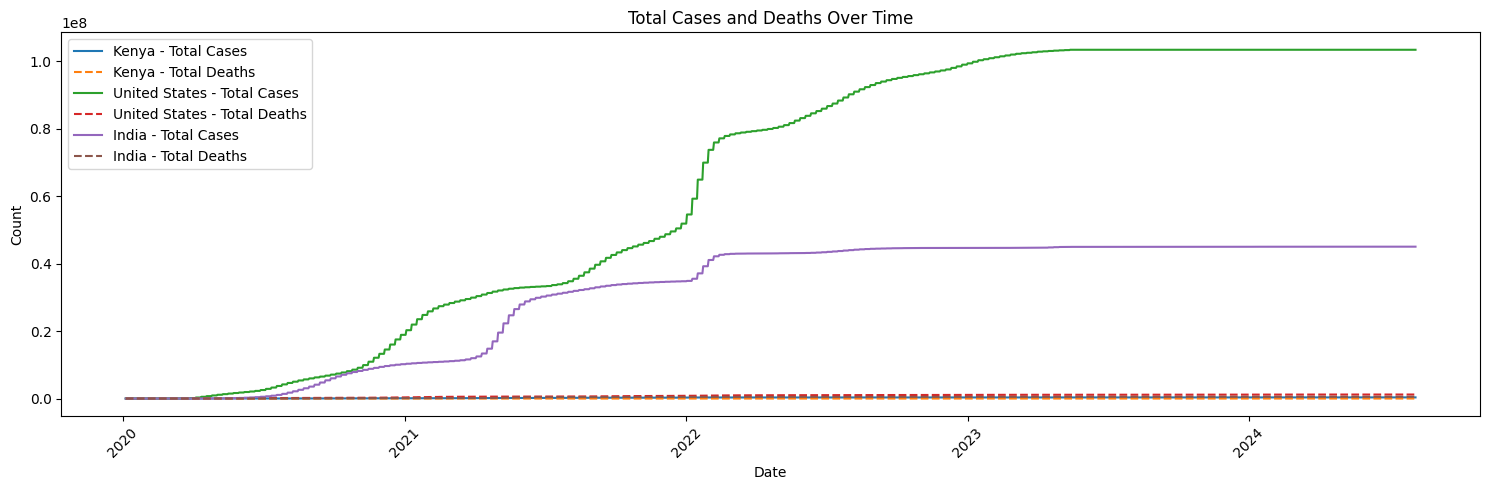

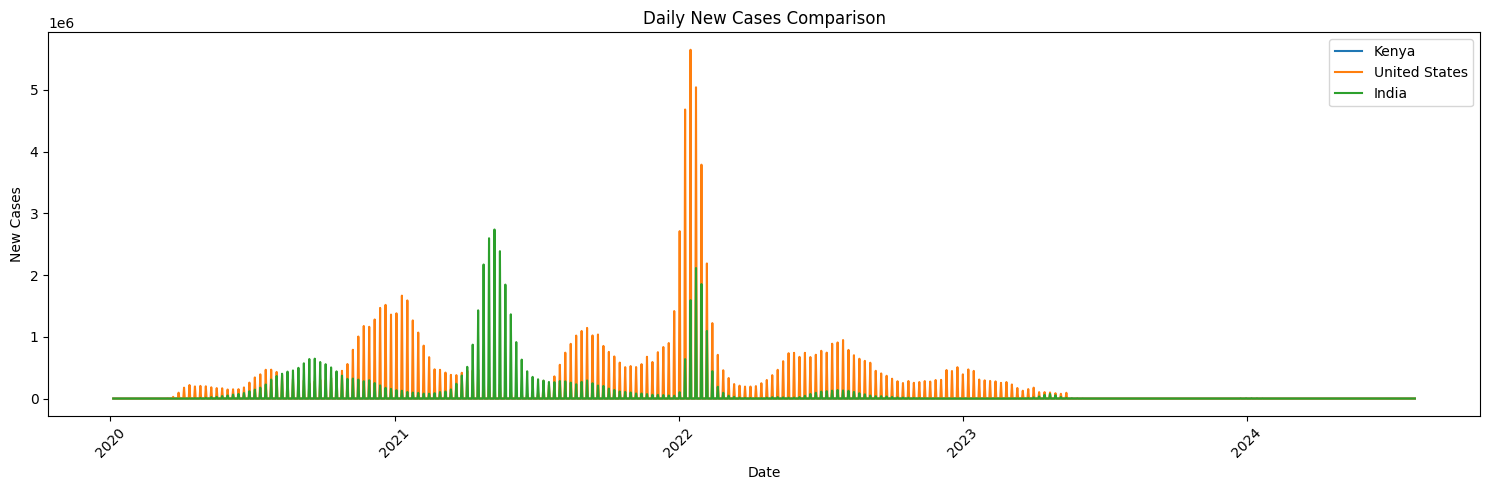

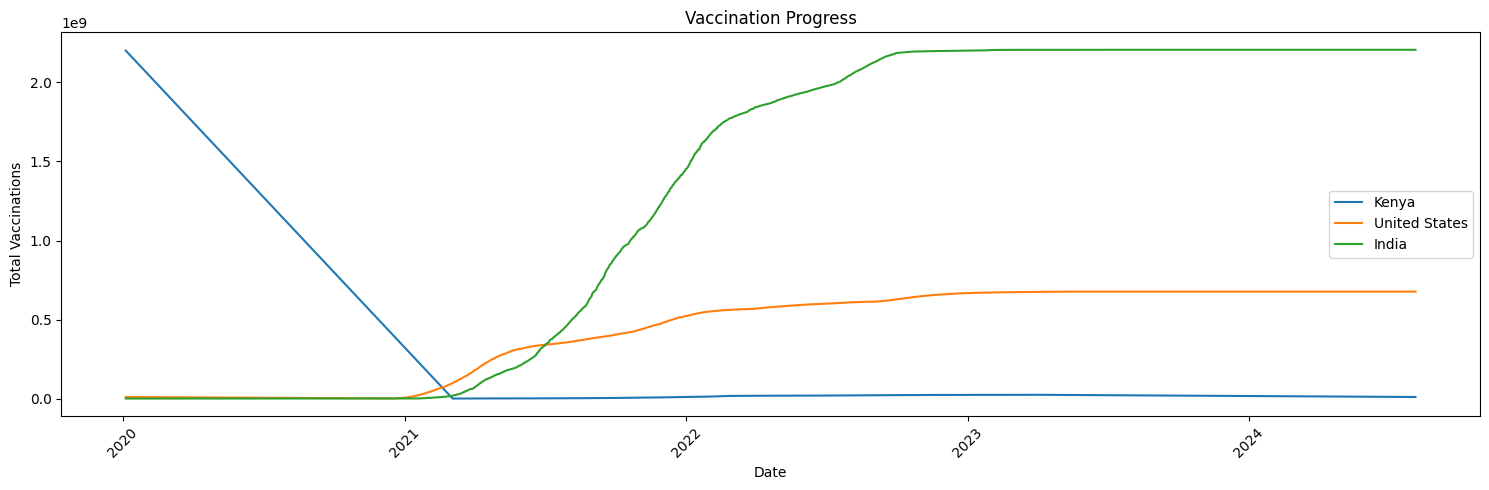

In [8]:
import matplotlib.pyplot as plt

# Plotting total cases and deaths over time
plt.figure(figsize=(15, 5))
for country in ['Kenya', 'United States', 'India']:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=f'{country} - Total Cases')
    plt.plot(country_data['date'], country_data['total_deaths'], label=f'{country} - Total Deaths', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Cases and Deaths Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting new cases over time
plt.figure(figsize=(15, 5))
for country in ['Kenya', 'United States', 'India']:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New Cases Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting total vaccinations over time
plt.figure(figsize=(15, 5))
for country in ['Kenya', 'United States', 'India']:
    country_data = vaccination_df[vaccination_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Vaccination Progress')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Insights & Reporting**

## Based on the analysis of the COVID-19 data for Kenya, the United States, and India, here are some key insights:

- **1. Disparities in COVID-19 Impact:** The United States experienced the highest total cases and deaths, followed by India, and then Kenya. This highlights significant differences in the pandemic's impact across countries.


- **2. Vaccination Progress:** The United States had the most advanced vaccination progress, with high total vaccinations, people vaccinated, and people fully vaccinated compared to India and Kenya. This may suggest a correlation between vaccination rates and lower case and death counts.


- **3. Daily New Cases:** The United States witnessed the highest daily new cases, indicating a rapid spread of the virus at certain periods. The daily new cases in India also saw notable peaks, while Kenya's numbers remained relatively lower. These daily trends could be attributed to specific events or outbreaks within those countries.

- **4. Death Rate:** The death rate (calculated as total deaths divided by total cases) varied among countries. This metric could reflect differences in healthcare systems, demographics, or other factors influencing mortality related to COVID-19.


- **5. Correlation Between Cases and Deaths:** A strong positive correlation was observed between total cases and total deaths, indicating that as the number of cases increased, the number of deaths tended to increase as well. This correlation highlights the severity of the virus and the importance of controlling its spread.

# **Anomalies/Interesting Patterns:**

- Despite having a lower total number of cases compared to the United States, India recorded a similar average death rate, potentially indicating underlying factors such as healthcare infrastructure or population demographics.
- Kenya, while having the lowest case and death counts, exhibited a relatively slow vaccination rollout, suggesting the need for greater accessibility and vaccine distribution efforts.
